#### In this lab, we explore the resampling techniques covered in Lesson 6

In [1]:
#Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score, ShuffleSplit
plt.style.use('fivethirtyeight')


%matplotlib inline

C:\Users\louis\AppData\Local\Temp\ipykernel_14460\891333006.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Data set used

https://archive.ics.uci.edu/ml/datasets/Diabetes

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking the data

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

#### The data looks clean. So we can start with the analysis.

## Basic Exploratory Data Analysis

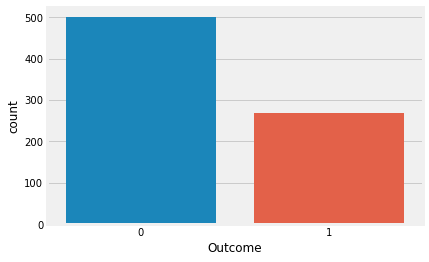

In [7]:
sns.countplot(x='Outcome',data=df)
plt.show()

## Pair Plots

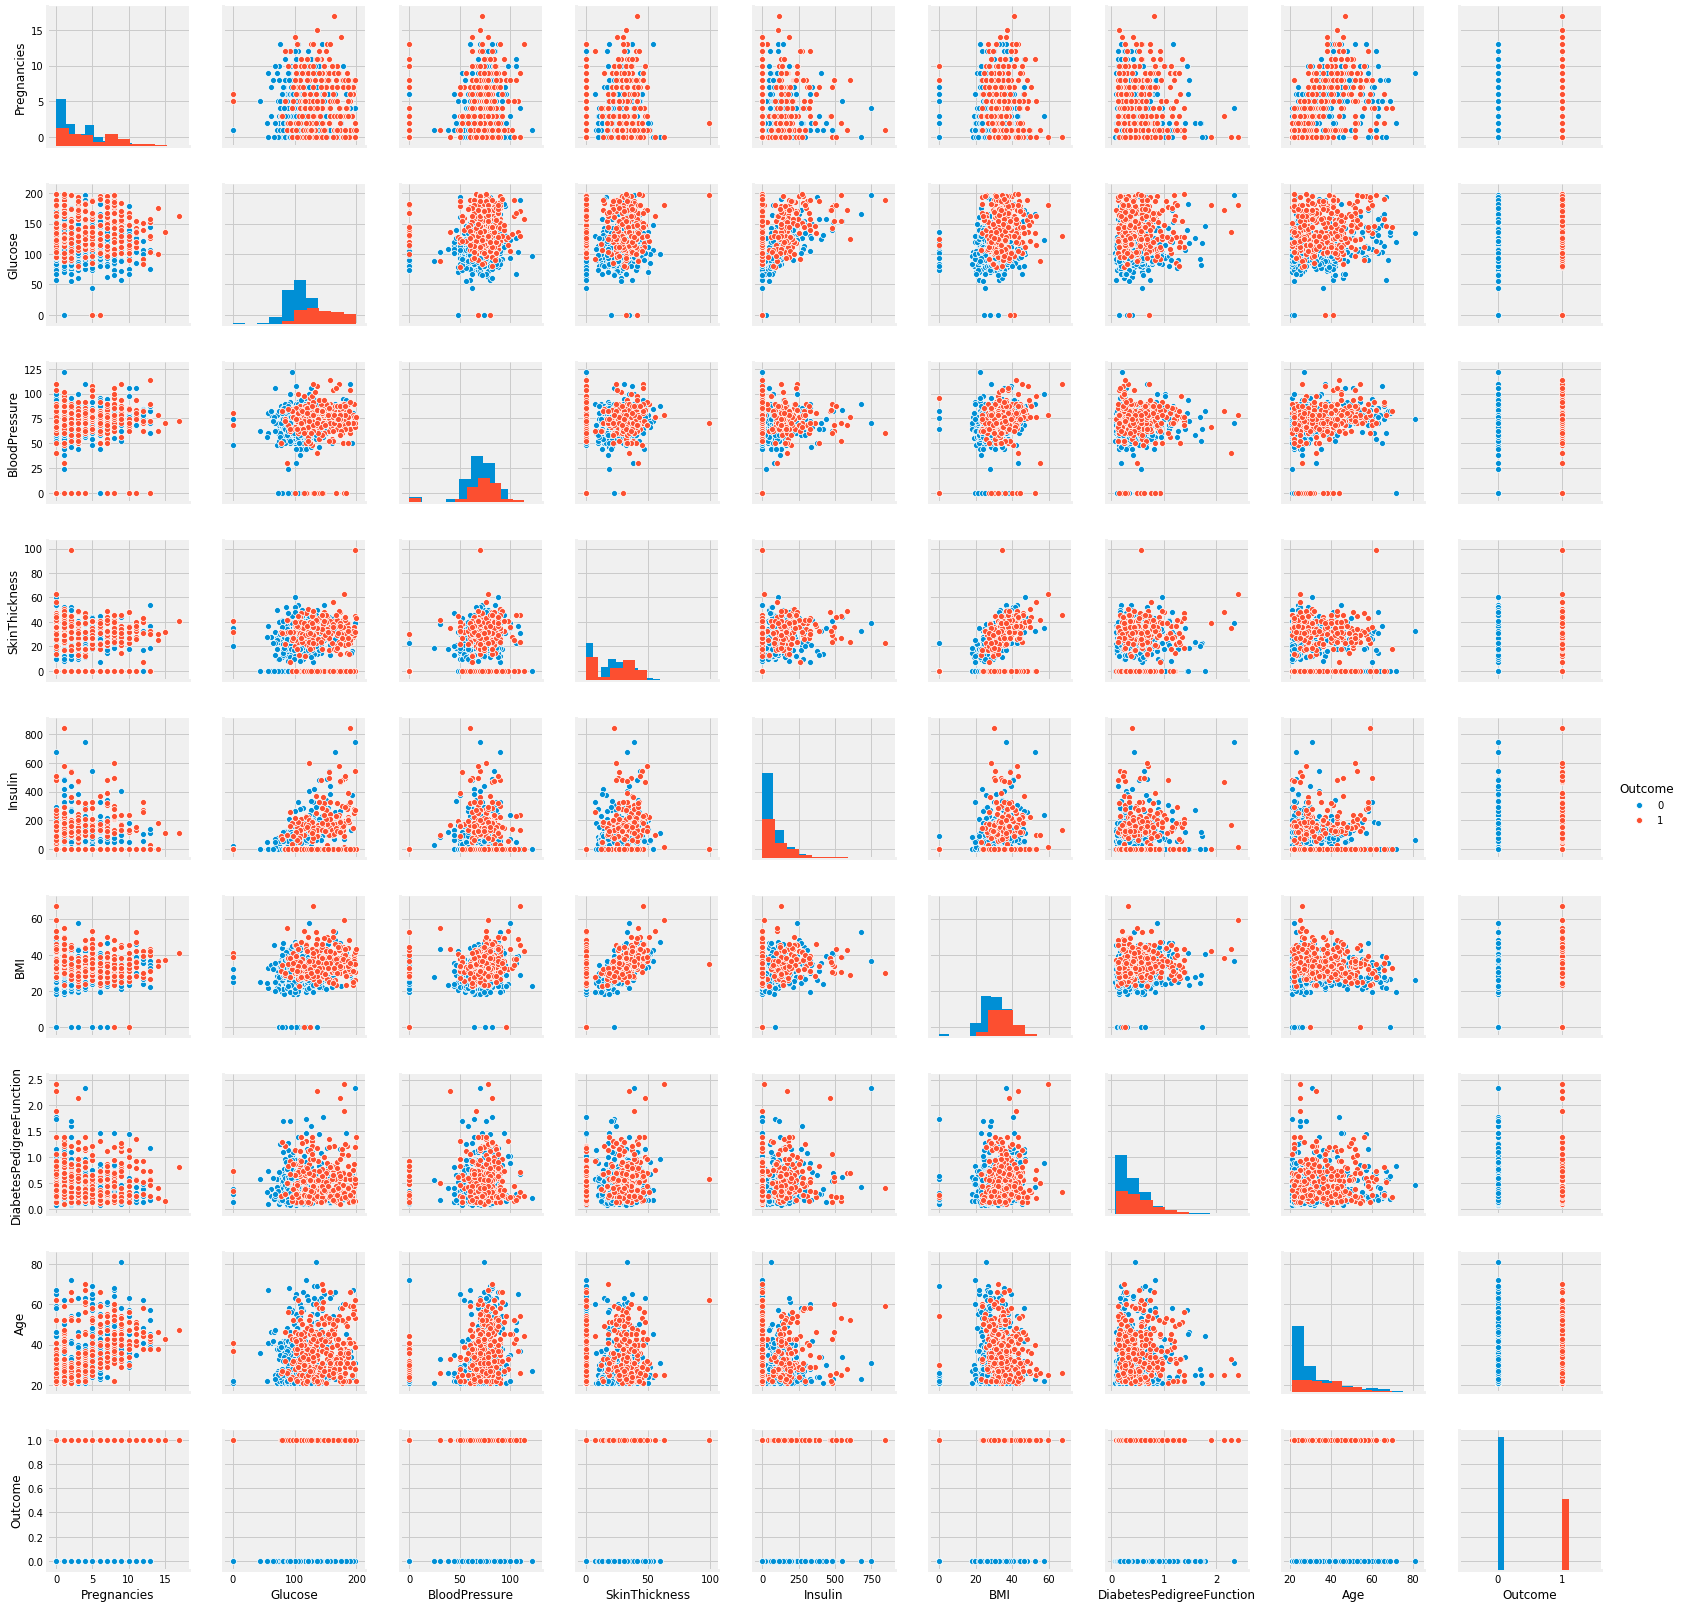

In [8]:
sns.pairplot(data=df,hue='Outcome',diag_kind='hist')
plt.show()

#### Observations

1) The diagonal shows the distribution of the dataset with the histograms.

2) The scatter-plots shows the relation between each and every features taken pairwise. Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the two class instances.

## Correlation Matrix

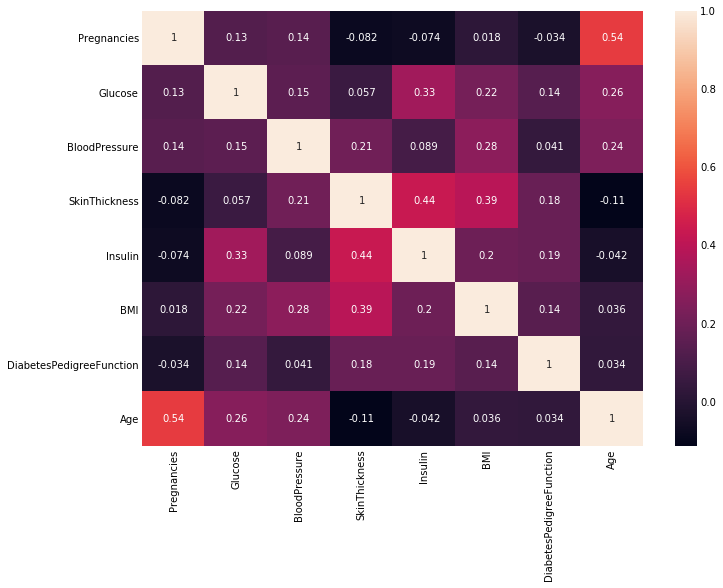

In [9]:
sns.heatmap(df[df.columns[:8]].corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### Observations

1) All features look to be uncorrelated. So we cannot eliminate any features just by looking at the correlation matrix.

## Predictive modelling

In [10]:
#Stratify sampling

label = df['Outcome']
features = df[df.columns[:8]]
train,test = train_test_split(df,test_size=0.30, stratify=label)
X_train = train[train.columns[:8]]
X_test = test[test.columns[:8]]
Y_train = train['Outcome']
Y_test = test['Outcome']

In [11]:
accuracy=[]
classifiers=['Logistic Regression','KNN','Decision Tree']
models=[LogisticRegression(solver = 'lbfgs', max_iter=200),KNeighborsClassifier(n_neighbors=4),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(X_train,Y_train)
    prediction=model.predict(X_test)
    accuracy.append(metrics.accuracy_score(prediction,Y_test))
models_dataframe=pd.DataFrame(accuracy,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Logistic Regression,0.761905
KNN,0.709957
Decision Tree,0.692641


round 0 test error: 0.775
round 1 test error: 0.766
round 2 test error: 0.779
round 3 test error: 0.736
round 4 test error: 0.753
round 5 test error: 0.775
round 6 test error: 0.797
round 7 test error: 0.779
round 8 test error: 0.753
round 9 test error: 0.749


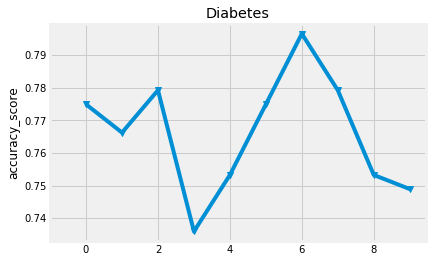

In [13]:
accuracy = []
n  = 10
for i in range(0, n):
    #Split the data
    train,test = train_test_split(df, test_size=0.30, stratify=label)
    X_train = train[train.columns[:8]]
    X_test = test[test.columns[:8]]
    Y_train = train['Outcome']
    Y_test = test['Outcome']
    # instantiate and fit model
    model = LogisticRegression(solver='lbfgs', max_iter=200)
    model.fit(X_train, Y_train)
    # calculate errors
    test_error = metrics.accuracy_score(Y_test, model.predict(X_test))
    accuracy.append(test_error)
    # print errors as report
    print('round {} test error: {}'.format(i, round(test_error,3)))

plt.plot(accuracy, '-v')
# plt.xlabel('Number of principal components in regression')
plt.ylabel('accuracy_score')
plt.title('Diabetes')
plt.xlim(xmin=-1);

## Leave One Out Cross Validation

In [14]:
loocv = LeaveOneOut()

model = LogisticRegression(solver = 'lbfgs', max_iter=500)
results = cross_val_score(model, features, label, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.604% (41.689%)


## K-fold Cross Validation using the Logistic Regression model

In [15]:
kfold = KFold(n_splits=10) # k=10

model = LogisticRegression(solver = 'lbfgs', max_iter=500)
results = cross_val_score(model, features, label, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: 77.60% (5.16%)


In [16]:
seed = 7
for i in range(0,10):
    kfold = KFold(n_splits=10, shuffle=True) # k=10
    model = LogisticRegression(solver = 'lbfgs', max_iter=500)
    results = cross_val_score(model, features, label, cv=kfold)
    print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: 77.21% (4.72%)
Accuracy: 77.09% (5.88%)
Accuracy: 77.20% (6.71%)
Accuracy: 77.74% (3.35%)
Accuracy: 76.84% (4.01%)
Accuracy: 77.35% (3.50%)
Accuracy: 77.34% (4.41%)
Accuracy: 77.74% (3.50%)
Accuracy: 78.13% (3.59%)
Accuracy: 77.20% (6.97%)


### Indeed, 10-fold CV is more stable!

## Boostrap

In [17]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np

values = df.values
# configure bootstrap

n_iterations = 50
n_size = int(len(df) * 0.50)

In [18]:
# run bootstrap

stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    # fit model
    model = LogisticRegression(solver = 'lbfgs', max_iter=500)
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    print(score)
    stats.append(score)

0.7690677966101694
0.7510917030567685
0.7568134171907757
0.7758620689655172
0.7425531914893617
0.775377969762419
0.7570498915401301
0.7846481876332623
0.7939914163090128
0.7828947368421053
0.7697228144989339
0.7429805615550756
0.7456896551724138
0.7777777777777778
0.776595744680851
0.7890295358649789
0.7451403887688985
0.7575107296137339
0.7531914893617021
0.7473684210526316
0.7278617710583153
0.7849462365591398
0.7489270386266095
0.7554585152838428
0.7626373626373626
0.7611940298507462
0.7688984881209503
0.750524109014675
0.7607758620689655
0.7537796976241901
0.7768052516411379
0.7542735042735043
0.7606837606837606
0.7361702127659574
0.7386609071274298
0.7651991614255765
0.7667386609071274
0.7737068965517241
0.782608695652174
0.7505376344086021
0.7658227848101266
0.7697228144989339
0.7678958785249458
0.7952069716775599
0.7566371681415929
0.7578947368421053
0.76
0.7813852813852814
0.7611940298507462
0.7800829875518672


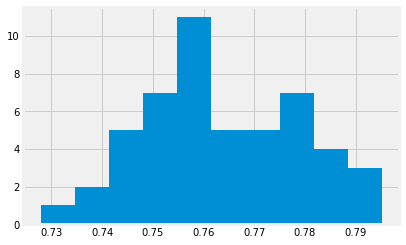

In [19]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()


### Computing the confidence interval

In order to compute the confidence interval we first start by ordering the statistics, then selecting values at the chosen percentile for the confidence interval. For example, we sort the values from smallest to largest and take the nth sample as estimate based on the chosen percentile that we call alpha. 

We're interested in a confidence interval of 95% so in this case alpha will be 0.95. 

We would select the value at the 2.5% percentile as the lower bound and the 97.5% percentile as the upper bound on the statistic of interest.

For example, if we calculated 1,000 statistics from 1,000 bootstrap samples, then the lower bound would be the 25th value and the upper bound would be the 975th value, assuming the list of statistics was ordered.

We are therefore able to compute a non-parametric confidence interval that does not make any assumption about the functional form of the distribution of the statistic. This confidence interval is often called the empirical confidence interval.

In [20]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100 #2.5%
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100 #97.5%
upper = min(1.0, np.percentile(stats, p))
print('%.1f%% confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0% confidence interval 73.7% and 79.3%
